## Исследование данных о российском кинопрокате



## Описание проекта


Заказчик этого исследования — Министерство культуры Российской Федерации.
Вам нужно изучить рынок российского кинопроката и выявить текущие тренды. Уделите внимание фильмам, которые получили государственную поддержку. Попробуйте ответить на вопрос, насколько такие фильмы интересны зрителю.
Вы будете работать с данными, опубликованными на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.

### Шаг 1. Откроем файлы с данными и объединим их в один датафрейм. 

In [76]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

In [77]:
pd.options.display.float_format ='{:,.3f}'.format
df1 = pd.read_csv('mkrf_movies.csv')
df2 = pd.read_csv('mkrf_shows.csv')
display(df1.head(10))
df1.info()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия"
7,Любовь и сигареты,221074614,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия"
8,Отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал"
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [78]:
display(df2.head(10))
df2.info()

,puNumber,box_office
0,111000113,"2,450.000"
1,111000115,"61,040.000"
2,111000116,"153,030,013.400"
3,111000117,"12,260,956.000"
4,111000118,"163,684,057.790"
5,111000119,"4,293,649.510"
6,111000212,200.000
7,111000216,"355,567.000"
8,111000313,710.000
9,111000314,"1,607,970.000"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


Посмотрели две изначальные таблицы методом info(), чтобы понять по какому столбцу соединять. Собственно ниже применяем метод merge, чтобы получить готовый датафрейм, с которым будем работать в дальнейшем.

In [79]:
df1['puNumber'] = df1['puNumber'].replace(' ', '')
df1.loc[df1['puNumber'] == 'нет', 'puNumber'] = 0
df1['puNumber'] = df1['puNumber'].astype('int')
df = df1.merge(df2, on =  'puNumber', how = 'left')
display(df.head())
df.info()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int32  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

Поменяем формат столбца `show_start_date`

In [80]:
df['show_start_date'] = pd.to_datetime(
    df['show_start_date'], format='%Y-%m-%dT%H:%M:%S'
)
df['show_start_date'] = pd.DatetimeIndex(df['show_start_date']).floor('S').tz_localize(None)
display(df.head())

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


Заменим формат столбца `ratings` на float

In [81]:
df['ratings'] = pd.to_numeric(df['ratings'], errors='coerce')
df['ratings'] = df['ratings'].fillna(0).astype('float64')
df['ratings'].unique()        

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, 0. , 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6, 4.2,
       5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 3.7, 1.4, 3.1, 3.5, 3.2, 2.8,
       1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 1. , 1.3, 1.9, 1.8, 1.2, 1.7,
       9. , 8.9, 9.1])

Остальные столбцы не требуют замены типа данных.

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

Посмотрим количество пропусков в датафрейме по столбцам

In [82]:
display(df.isna().sum())

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                     0
genres                    976
box_office               4328
dtype: int64

Для наглядности посчитаем долю пропусков в процентах

In [83]:
df.isna().mean()*100

title                    0.000
puNumber                 0.000
show_start_date          0.000
type                     0.000
film_studio              0.240
production_country       0.027
director                 0.120
producer                 7.587
age_restriction          0.000
refundable_support      95.565
nonrefundable_support   95.565
budget                  95.565
financing_source        95.565
ratings                  0.000
genres                  13.038
box_office              57.815
dtype: float64

In [84]:
fill_list = ['film_studio', 'production_country', 'director', 'producer', 'genres']
for value in fill_list:
  df[value].fillna('Unknown', inplace = True)
df.isna().mean()*100

title                    0.000
puNumber                 0.000
show_start_date          0.000
type                     0.000
film_studio              0.000
production_country       0.000
director                 0.000
producer                 0.000
age_restriction          0.000
refundable_support      95.565
nonrefundable_support   95.565
budget                  95.565
financing_source        95.565
ratings                  0.000
genres                   0.000
box_office              57.815
dtype: float64

Заменил в столбцах `film_studio` `production_country` `director` `producer` `genres` все пропуски на Unknown,так как у нас нет какой-то другой информации для замены. Остальные столбцы мы рассмотрим в другом пункте.

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

Посмотрим явные дубликаты во всем датафрейме.

In [85]:
display(df[df['puNumber'].duplicated() == True])
df = df.drop_duplicates(subset=['puNumber'])
print(df.duplicated().sum())

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.600,"драма,мелодрама,история",NaN
5068,Анализируй то!,221054410,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.800,"комедия,криминал",NaN


0


In [86]:
display(df[df[['title', 'director', 'type', 'production_country']].duplicated() == True])
print(df.duplicated(subset=['title', 'director', 'type', 'production_country']).sum())
df = df.drop_duplicates(subset=['title', 'director', 'type', 'production_country'])

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3,Особо опасен,221026916,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.800,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.800,"фантастика,боевик,триллер",NaN
41,Алекс и Эмма,221004616,2016-02-09 12:00:00,Художественный,"Эскейп Артистс, Франчайз Пикчерз, Рейнер-Грэйс...",США,Роб Райнер,"Тодд Блэк, Элан Грейсман, Джереми Левен, Роб Р...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.400,"мелодрама,комедия",NaN
110,Гарри Поттер и орден Феникса /По роману Дж.К.Р...,121026316,2016-09-23 12:00:00,Художественный,"Уорнер Бразерс, Хэйдей Филмз",США - Великобритания,Дэвид Йетс,"Дэйвид Баррон, Дэйвид Хейман",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.700,"фэнтези,приключения,семейный","759,526.000"
113,Гарри Поттер и узник Азкабана /По роману Дж.К....,121026116,2016-09-23 12:00:00,Художественный,"Хэйдей Филмз, 1492 Пикчерз, Уорнер Бразерс",США,Альфонсо Куарон,Майкл Барната,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.200,"фэнтези,приключения,семейный","1,125,302.000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7255,Красная шапка против зла,124007319,2019-09-17 12:00:00,Анимационный,"Эджис Филм Фонд, Элинг Студиос, Фрэджил Филмз,...",США,Майкл Д'Иса-Хоган,Барнаби Томпсон,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,5.800,"мультфильм,комедия,криминал",NaN
7264,Руби и повелитель воды,124007619,2019-09-30 12:00:00,Анимационный,Итс Картун Анимейшн Студио,КНР,Дин Ши,Ван Юньфэй,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,0.000,Unknown,NaN
7265,Альдабра: Путешествие по таинственному острову,126003719,2019-09-30 12:00:00,Прочие,Старлайт Пикчерз,Чехия,Стив Лихтаг,"Петр Келлер, Роберт Шнайдер, Леопольдо Гоут",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.800,"семейный,приключения,документальный",NaN
7301,Ночь живых мертвецов,121029119,2019-10-30 12:00:00,Художественный,"Имейдж Тен, Лаурель Групп, Маркет Скьяр Продак...",США,Джордж А.Ромеро,"Расселл Страйнер, Карл Хардмен",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.300,"ужасы,триллер",NaN


674


In [87]:
display(df.head(5))

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.200,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,Unknown,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.600,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.800,"фантастика,боевик,триллер",NaN
5,Остановился поезд,111013816,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,Unknown,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.700,драма,NaN
6,Любовь и голуби,111007013,2013-10-18 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,Unknown,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.300,"мелодрама,комедия","2,700.000"


Как мы можем увидеть, если смотреть без условия на названия столбцов, то явных дубликатов не будет, так как отличается `puNumber`, но все остальные элементы совпадают. Поэтому смотрим только по двум столбцам и находим 683 дубликата и затем убираем их.



#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

In [88]:
print(df['type'].unique())
df['type'] = df['type'].str.strip()
print(df['type'].unique())

['Художественный' 'Анимационный' 'Прочие' 'Документальный'
 'Научно-популярный' ' Художественный' ' Анимационный'
 'Музыкально-развлекательный']
['Художественный' 'Анимационный' 'Прочие' 'Документальный'
 'Научно-популярный' 'Музыкально-развлекательный']


Убрали случайные пробелы вначале, такая проблема могла возникнуть из-за человеческого фактора.

In [90]:
print(df['age_restriction'].unique())

['«18+» - запрещено для детей' '«6+» - для детей старше 6 лет'
 '«12+» - для детей старше 12 лет' '«16+» - для детей старше 16 лет'
 '«0+» - для любой зрительской аудитории']


Данный столбец также не имеет никаких проблем.

In [91]:
print(df['financing_source'].unique())

[nan 'Министерство культуры' 'Фонд кино'
 'Министерство культуры, Фонд кино']


Нет никаких проблем в данном столбце


По факту убрали лишние пробелы только в столбце `type`, остальные столбцы не имеют ничего, что можно поменять или убрать.

Я думаю что общая проблема категориальных столбцов в большом количестве уникальных значений, то есть по факту они никак не разбивают на категории. Например, если хотя бы одна страна отличается, которая участвовала в производстве фильма, то это уже совсем другое уникальное значение.

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

In [93]:
print(df[df['budget'] == 0].describe())

             puNumber  refundable_support  nonrefundable_support  budget  \
count          17.000              17.000                 17.000  17.000   
mean  112,067,204.471      16,705,882.353         65,174,674.412   0.000   
std     1,473,501.270      20,064,784.779         61,236,204.091   0.000   
min   111,000,415.000               0.000                  0.000   0.000   
25%   111,009,615.000               0.000         23,000,000.000   0.000   
50%   111,017,315.000      10,000,000.000         51,000,000.000   0.000   
75%   114,001,715.000      20,000,000.000         75,000,000.000   0.000   
max   114,006,518.000      60,000,000.000        250,000,000.000   0.000   

       ratings        box_office  
count   17.000            17.000  
mean     5.388   163,137,294.425  
std      1.648   251,115,991.429  
min      0.000     1,334,699.400  
25%      5.000    50,451,949.000  
50%      5.600    72,937,783.200  
75%      6.300   184,487,551.400  
max      7.800 1,038,321,489.000  


Так как мы ограничили бюджет 0, а столбцы `refundable_support` `nonrefundable_support` при этом не 0, хотя исходя из описания названий каждого из столбцов `budget` это, как минимум, сумма `refundable_support` `nonrefundable_support`, поэтому он не может быть равен 0 . Напишем функцию которая добавит новый столбец, в котором будет как раз таки сумма двух столбцов.

In [94]:
def repair_budget(row):
    if row['budget'] < (row['refundable_support'] + row['nonrefundable_support']):
        return row['refundable_support'] + row['nonrefundable_support']
    return row['budget']
df['repaired_budget'] = df.apply(repair_budget, axis = 1)
df.describe()

,puNumber,refundable_support,nonrefundable_support,budget,ratings,box_office,repaired_budget
count,"6,810.000",331.000,331.000,331.000,"6,810.000","3,027.000",331.000
mean,"130,784,224.305","11,900,302.115","49,038,333.269","127,469,081.387",5.519,"75,392,839.841","131,674,427.202"
std,"34,103,400.571","24,945,704.904","60,061,812.815","188,823,340.914",2.495,"237,344,584.518","187,375,150.397"
min,0.000,0.000,0.000,0.000,0.000,0.000,"6,000,000.000"
25%,"112,001,943.750",0.000,"25,000,000.000","42,000,000.000",5.200,"119,359.500","45,510,944.000"
50%,"121,013,311.000",0.000,"30,000,000.000","68,809,226.000",6.300,"2,418,702.000","71,517,631.000"
75%,"124,000,415.750","15,000,000.000","40,750,000.000","143,945,639.000",7.100,"23,608,211.370","150,000,000.000"
max,"231,001,012.000","180,000,000.000","400,000,000.000","2,305,074,303.000",9.200,"3,073,568,690.790","2,305,074,303.000"


В итоге, мы просто создали новый столбец, который является суммой двух других, в остальных столбцах проблем нет.

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [95]:
df['year'] = df['show_start_date'].dt.year
display(df.head())

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,repaired_budget,year
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.200,"боевик,драма,мелодрама",NaN,NaN,2015
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,Unknown,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.600,"драма,военный",NaN,NaN,2016
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.800,"фантастика,боевик,триллер",NaN,NaN,2016
5,Остановился поезд,111013816,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,Unknown,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.700,драма,NaN,NaN,2016
6,Любовь и голуби,111007013,2013-10-18 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,Unknown,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.300,"мелодрама,комедия","2,700.000",NaN,2013


- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [96]:
df['director_first'] = df['director'].str.split(",").str[0]
df['genre_first'] = df['genres'].str.split(',').str[0]
display(df.head())

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,repaired_budget,year,director_first,genre_first
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.200,"боевик,драма,мелодрама",NaN,NaN,2015,Кевин Костнер,боевик
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,Unknown,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.600,"драма,военный",NaN,NaN,2016,Е.Матвеев,драма
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.800,"фантастика,боевик,триллер",NaN,NaN,2016,Тимур Бекмамбетов,фантастика
5,Остановился поезд,111013816,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,Unknown,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.700,драма,NaN,NaN,2016,В.Абдрашитов,драма
6,Любовь и голуби,111007013,2013-10-18 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,Unknown,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.300,"мелодрама,комедия","2,700.000",NaN,2013,В.Меньшов,мелодрама


Добавили два столбца, которые удовлетворяют требованию задания.

- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [97]:
df['budget_ratio'] = (df['refundable_support'] + df['nonrefundable_support'])/df['repaired_budget']
print(df['budget_ratio'].describe())

count   331.000
mean      0.542
std       0.197
min       0.044
25%       0.385
50%       0.613
75%       0.662
max       1.000
Name: budget_ratio, dtype: float64


#### Вывод

Изменили типы данных в двух столбцах, были найденны дубликаты и удалены, также рассмотрели категориальные и количественные значения по которым проведен анализ. Также добавили 2 новых столбца в датафрейм.

### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

,year,count
0,2010,88
1,2011,98
2,2012,116
3,2013,176
4,2014,257
5,2015,431
6,2016,501
7,2017,357
8,2018,474
9,2019,529


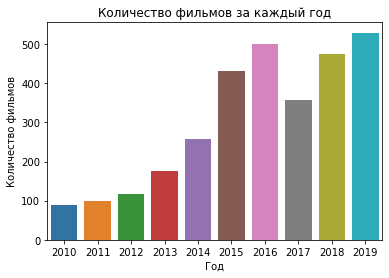

In [98]:
film_per_year = df.groupby('year')['box_office'].count().reset_index()
film_per_year.columns = ['year', 'count']
display(film_per_year)

ax = sb.barplot(x = 'year', y = 'count', data = film_per_year);
ax.set_title('Количество фильмов за каждый год');
ax.set_xlabel('Год');
ax.set_ylabel('Количество фильмов');

In [99]:
print(1 - df['box_office'].isna().sum()/ df.shape[0])

0.44449339207048455


Вывели количество фильмов по годам, которые выходили в прокат, также для наглядности построили график. Доля таких фильмов составила 0.445 от общего количества фильмов.

,year,mean
0,2010,11.564
1,2011,20.545
2,2012,22.437
3,2013,29.831
4,2014,35.205
5,2015,65.204
6,2016,64.981
7,2017,71.400
8,2018,53.620
9,2019,57.563


Text(0, 0.5, 'Среднее количество фильмов')

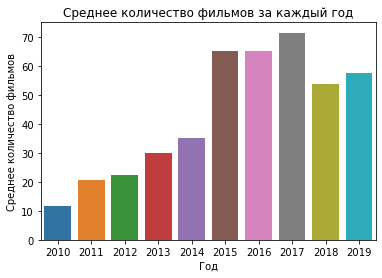

In [100]:
box_per_year_mean = (df[['year', 'box_office']]
                     .groupby('year')
                     .apply(lambda x: x['box_office'].apply(pd.notna).mean())*100).to_frame().reset_index()
box_per_year_mean.rename(columns={0 : 'mean'}, inplace=True)
display(box_per_year_mean)
ax = sb.barplot(x='year', y='mean', data=box_per_year_mean);
ax.set_title('Среднее количество фильмов за каждый год')
ax.set_xlabel('Год')
ax.set_ylabel('Среднее количество фильмов')

Самая большая доля фильмов, которые выходили в прокат была в 2017 году. Период в котором полнее всего прдставлена в данных это 2015-2017 года.

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

,year,sum
0,2010,"2,374,340.000"
1,2011,"13,944,390.000"
2,2012,"6,465,111.000"
3,2013,"29,768,531.200"
4,2014,"7,372,598,571.600"
5,2015,"32,084,649,858.370"
6,2016,"43,731,444,689.340"
7,2017,"48,563,707,217.510"
8,2018,"47,985,723,095.290"
9,2019,"48,423,450,395.590"


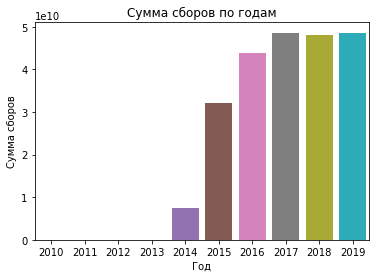

In [101]:
money_per_year = df.groupby('year')['box_office'].sum().reset_index()
money_per_year.columns = ['year', 'sum']
display(money_per_year)

ax = sb.barplot(x = 'year', y = 'sum', data = money_per_year);
ax.set_title('Сумма сборов по годам');
ax.set_xlabel('Год');
ax.set_ylabel('Сумма сборов');

C 2010 по 2013 на графике ничего не видно, потому что значения крайне малы по сравнению с другими годами. С 2017 по 2019 были самые пиковые значения. Сумма сборов была максимальной а 2017 году, а минимальной в 2010. 

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

,mean,median
year,,
2010,"26,981.136","1,868.000"
2011,"142,289.694","3,042.500"
2012,"55,733.716","6,692.500"
2013,"169,139.382","3,565.000"
2014,"28,687,153.975","22,490.000"
2015,"74,442,343.059","4,327,265.700"
2016,"87,288,312.753","3,640,802.300"
2017,"136,032,793.326","9,968,340.000"
2018,"101,235,702.733","8,821,498.980"


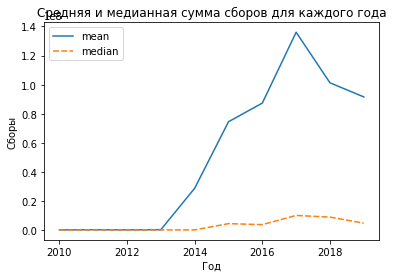

In [102]:
table = df.groupby('year')['box_office'].agg(['mean', 'median'])
display(table)
ax = sb.lineplot(data = table)
ax.set_title('Средняя и медианная сумма сборов для каждого года');
ax.set_xlabel('Год');
ax.set_ylabel('Cборы');

Как мы видим после 2013 года среднее начинает сильно отличаться от медианного значения. в обоих случаях пики приходятся на 2017 год.

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

,year,age_restriction,box_office
0,2015,«0+» - для любой зрительской аудитории,"273,367,767.780"
1,2015,«12+» - для детей старше 12 лет,"11,957,220,583.410"
2,2015,«16+» - для детей старше 16 лет,"8,274,253,188.890"
3,2015,«18+» - запрещено для детей,"3,184,097,942.980"
4,2015,«6+» - для детей старше 6 лет,"8,395,710,375.310"
5,2016,«0+» - для любой зрительской аудитории,"150,183,548.670"
6,2016,«12+» - для детей старше 12 лет,"12,178,337,053.010"
7,2016,«16+» - для детей старше 16 лет,"14,359,349,614.800"
8,2016,«18+» - запрещено для детей,"4,990,430,064.620"
9,2016,«6+» - для детей старше 6 лет,"12,053,144,408.240"


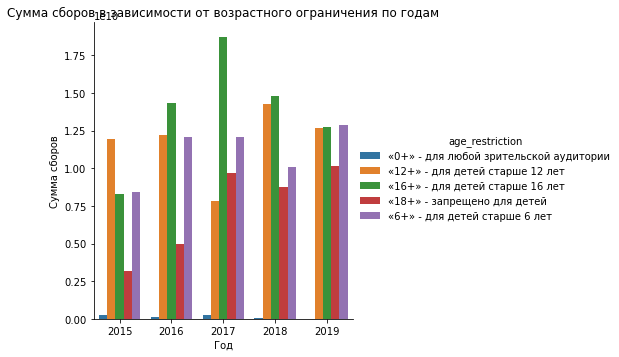

In [103]:
df.query('2015 <= year').groupby('age_restriction')['box_office'].sum().sort_values()
age_table = df.query('2015 <= year').groupby(['year', 'age_restriction'])['box_office'].agg('sum').reset_index()
display(age_table)

ax = sb.catplot(x='year', y='box_office', hue='age_restriction', data=age_table, kind='bar');
ax.set(xlabel ='Год', ylabel = 'Сумма сборов', title ='Сумма сборов в зависимости от возрастного ограничения по годам');

Меньше всего почти в каждом году набирали фильмы для любой зрительской аудитории. А самые большие сборы у фильмов с отметкой 16+ и 12+.

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

In [104]:
table_money = df[df['repaired_budget'].isna() == False].copy()
table_money['support'] = table_money['refundable_support'] + table_money['nonrefundable_support']
table_money['payback'] = table_money['box_office'] - table_money['repaired_budget']
table_money.describe()

,puNumber,refundable_support,nonrefundable_support,budget,ratings,box_office,repaired_budget,year,budget_ratio,support,payback
count,331.000,331.000,331.000,331.000,331.000,317.000,331.000,331.000,331.000,331.000,317.000
mean,"111,595,590.698","11,900,302.115","49,038,333.269","127,469,081.387",5.676,"132,843,063.693","131,674,427.202","2,016.713",0.542,"60,938,635.384","571,336.176"
std,"5,711,574.248","24,945,704.904","60,061,812.815","188,823,340.914",1.748,"335,287,034.808","187,375,150.397",1.638,0.197,"72,845,765.086","316,399,203.266"
min,"111,000,115.000",0.000,0.000,0.000,0.000,"1,550.000","6,000,000.000","2,013.000",0.044,"3,000,000.000","-1,971,477,243.410"
25%,"111,004,867.000",0.000,"25,000,000.000","42,000,000.000",5.200,"1,231,902.000","45,510,944.000","2,015.000",0.385,"25,322,500.000","-70,903,859.000"
50%,"111,010,415.000",0.000,"30,000,000.000","68,809,226.000",6.100,"16,077,204.000","71,517,631.000","2,017.000",0.613,"35,000,000.000","-40,518,222.500"
75%,"111,017,816.500","15,000,000.000","40,750,000.000","143,945,639.000",6.700,"106,514,301.030","150,000,000.000","2,018.000",0.662,"60,000,000.000","-2,312,697.880"
max,"214,010,116.000","180,000,000.000","400,000,000.000","2,305,074,303.000",8.500,"3,073,568,690.790","2,305,074,303.000","2,019.000",1.000,"500,000,000.000","2,913,568,690.790"


In [105]:
table_money.groupby('year')['support'].agg(['count', 'sum'])

,count,sum
year,,
2013,2,"134,347,945.000"
2014,16,"572,002,299.000"
2015,86,"3,656,241,459.000"
2016,61,"4,303,155,482.000"
2017,41,"3,183,971,662.000"
2018,56,"3,446,969,465.000"
2019,69,"4,874,000,000.000"


По данным, которые мы вывели, видно, что более 75% фильмов имеют убыток, но при этом среднее равно 571336. Это связано с тем, что есть фильмы, которые бьют рекорды по просмотром и продажам билетов. 

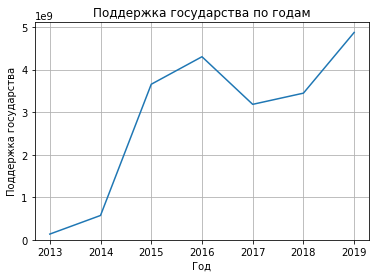

In [106]:
ax = table_money.groupby('year')['support'].sum().plot(grid=True,ylim=0);
ax.set_title('Поддержка государства по годам');
ax.set_xlabel('Год');
ax.set_ylabel('Поддержка государства');

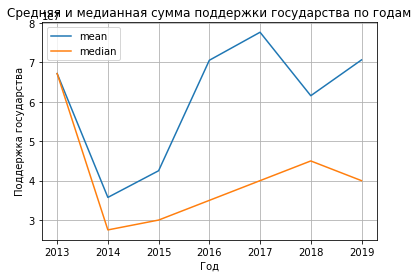

In [107]:
ax = table_money.groupby('year')['support'].agg(['mean', 'median']).plot(grid=True);
ax.set_title('Средняя и медианная сумма поддержки государства по годам');
ax.set_xlabel('Год');
ax.set_ylabel('Поддержка государства');

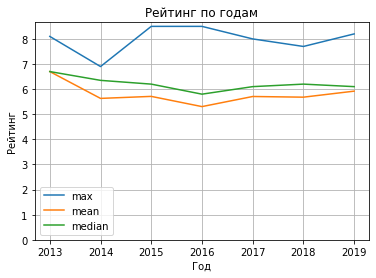

In [108]:
ax = table_money.groupby('year')['ratings'].agg(['max', 'mean', 'median']).plot(grid=True, ylim=0)
ax.set_title('Рейтинг по годам');
ax.set_xlabel('Год');
ax.set_ylabel('Рейтинг');

Как можно увидеть, чем больше государство начинало с 2013 года вкладывать денег, тем больше проседал рейтинг фильмов до 2016 года, затем средний рейтинг начал расти.

In [109]:
print(table_money['support'].corr(table_money['ratings']))
print(table_money['repaired_budget'].corr(table_money['ratings']))
print(table_money['payback'].corr(table_money['ratings']))

0.12921042887612816
0.13111752357560205
0.04525291659406608


Во всех трех случаях корреляция очень низкая, то есть рейтинг фильмов не зависит от поддержки государством, от бюджета и от выручки.

In [110]:
genres_support = table_money.groupby('genre_first')['support'].agg(['count', 'sum', 'mean', 'median']).sort_values('sum', ascending=False)
display(genres_support)
genres_ratings = table_money.groupby('genre_first')['ratings'].agg(['count', 'mean', 'median']).sort_values('mean', ascending=False)
display(genres_ratings)

,count,sum,mean,median
genre_first,,,,
драма,93,"5,314,406,632.000","57,144,157.333","30,000,000.000"
комедия,74,"3,218,282,945.000","43,490,310.068","35,000,000.000"
мультфильм,31,"2,461,520,000.000","79,403,870.968","70,000,000.000"
фантастика,11,"1,406,000,000.000","127,818,181.818","30,000,000.000"
история,4,"1,020,000,000.000","255,000,000.000","240,000,000.000"
фэнтези,10,"1,002,900,000.000","100,290,000.000","62,000,000.000"
триллер,15,"769,645,285.000","51,309,685.667","40,000,000.000"
приключения,7,"696,000,000.000","99,428,571.429","40,000,000.000"
Unknown,16,"688,969,465.000","43,060,591.562","30,000,000.000"


,count,mean,median
genre_first,,,
криминал,3,7.500,7.800
детский,4,7.125,7.250
спорт,3,6.933,7.000
биография,3,6.900,6.900
детектив,5,6.760,6.800
боевик,6,6.583,6.450
мюзикл,4,6.550,6.600
военный,9,6.467,6.400
драма,93,6.323,6.400


Государство больше всего поддерживает драму, комедию и мультфильмы. А по рейтингу на первом месте криминал, детский и спорт.

### Шаг 5. Напишите общий вывод

В этом проекте была проделана следующая работа:
- Были склеены два датафрейма
- Изменены типы данных в некоторых столбцах
- Выявлены дубликаты, как явные, так и неявные
- Обработаны количественные и категориальные переменные
- Проведен исследовательский анализ данных

Во время анализа было выяснено следущее:
1) 2017 год оказался самым прибыльным и заработал свыше 48,5 млрд рублей

2) в 2019 году было показано больше всего фильмов (529)

3) Больше всего выручки почти в каждом году принесла категория для лиц старше 16 лет

Также за время исследования мы узнали, что рейтинг фильмов не зависит от государственной поддержки, бюджета и выручки. Средняя выручка является положительно только за счет фильмов, у которых она очень большая, потому что более 75 процентов выборки имеет убыток. Также государство вкладывает деньги в первую очередь в драмы, мультфильмы и комедии. А самый высокий рейтинг у криминала и спорта.

В исходном датафрейме отсутствовало крайне много данных, которые, возможно, могли повлиять на ход исследования.